# `HOG` Example

Import the HOG module.

In [1]:
from Ardi.cv import HOG

Instantiate a `HOG` object. Here I name it `hog` (in lowercase).

In [2]:
hog = HOG()

Load the image using `load_image()` method. The argument passed to the method is an image path. Keep in mind that the image will directly be converted to grayscale and resized to the size of 128 x 64.

In [3]:
hog.load_image('dataset_test/run.jpg')

If the cell above does not return error, then the image should have been loaded properly. Let's check using `show_original()` method.

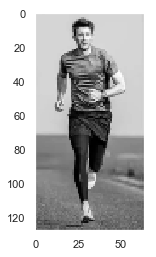

In [4]:
hog.show_original()

The above image itself is stored in `original_image` attribute. By checking the `shape` attribute of it, you will see that the image is already resized to 128 x 64.

In [5]:
hog.original_image.shape

(128, 64)

Now if you want to take the HOG features, you can call the `extract_features()` method. A warning might appear on your screen. This is because there is a division-by-zero during the angle calculation process. However we can just ignore the warning since the resulting value will be `nan`, in which it is got converted to 0 in the next process.

In [6]:
hog_features = hog.extract_features()

100%|██████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 1658.54it/s]
C:\Anaconda3\lib\site-packages\Ardi\cv.py:340: RuntimeWarning: divide by zero encountered in true_divide
  edge_direction = np.arctan(self.vertical_derivative/self.horizontal_derivative) * (180/np.pi)	# Finding the gradient direction.
C:\Anaconda3\lib\site-packages\Ardi\cv.py:340: RuntimeWarning: invalid value encountered in true_divide
  edge_direction = np.arctan(self.vertical_derivative/self.horizontal_derivative) * (180/np.pi)	# Finding the gradient direction.


After the code above is run, we are going to obtain the hog features, in which it is stored in `hog_features` variable. The code below shows how it looks like.

In [7]:
print(hog_features)
print(hog_features.shape)

[ 0.  1.  1. ... 10.  6.  6.]
(3780,)


You can also see the images produced during the feature extraction process.
1. After applying horizontal edge derivative kernel.
2. After applying vertical edge derivative kernel.
3. Combination of horizontal and vertical edge (edge magnitude).
4. Edge direction.

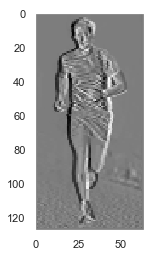

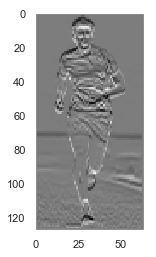

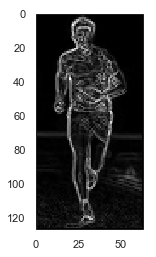

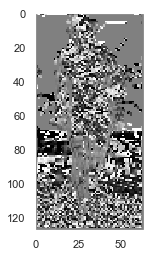

In [8]:
hog.show_horizontal_derivative()
hog.show_vertical_derivative()
hog.show_edge_magnitude()
hog.show_edge_direction()

Instead of directly calling `extract_features()` method, you can actually do the feature extraction process step by step like the following.

First, as usual we need to instantiate the `HOG` object in advance.

In [9]:
hog2 = HOG()

Load the image.

In [10]:
hog2.load_image('dataset_test/run.jpg')

Now we start off by calling `convolve()` method. This process is essentially done to take the horizontal and vertical edge derivative. Then it directly computes the overall edge magnitude as well as the edge direction.

In [11]:
hog2.convolve()

100%|██████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 1540.05it/s]


After that we are going to call the `create_histogram_for_every_cell()` method. As the name suggests, it is used to create the histogram of each cell.

In [12]:
hog2.create_histogram_for_every_cell()

Remember that our image has the size of 128 x 64. By dividing the image into cells of 8 x 8 pixels, now the image has been divided into cells of 16 x 8. The value of 9 below represents the number of edge direction bins.

In [13]:
hog2.cells_histograms.shape

(16, 8, 9)

If we access the top-left cell, we are going to see the histogram of it. Since our cell is made of 8 x 8 pixels, hence there will be 64 pixel values in total. Thus, the sum of the histogram values will be 64.

In [14]:
print(hog2.cells_histograms[0][0])
print(hog2.cells_histograms[0][0].sum())

[ 0.  1.  1.  0. 55.  0.  1.  2.  4.]
64.0


To actually take the HOG features of the entire image, we need to run the `create_histogram_for_every_block()` method.

In [15]:
hog2.create_histogram_for_every_block()

Below is how the HOG features look like after running the code above.

In [16]:
print(hog2.blocks_histograms)
print(hog2.blocks_histograms.shape)

[ 0.  1.  1. ... 10.  6.  6.]
(3780,)
